In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

In [2]:
from sklearn import linear_model

# Open data

In [3]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/1554f3a2-94a1-4cf8-ae79-8a6fef1b5f7e/FreeBehaviorPanNeuronalGCaMP6/100234/100234/100234ss2cregcdFF20sMkf349Smith0_4_60TS.mat


In [4]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(6185, 349)

In [5]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/1554f3a2-94a1-4cf8-ae79-8a6fef1b5f7e/FreeBehaviorPanNeuronalGCaMP6/100234/100234/100234ss2cregcdFF20sMkf349Smith0_4_60IC.nii


In [6]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(168, 111, 36, 349)

In [7]:
Time_fluoICA=np.array(range(11603))*0.01

Z-score

In [8]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [9]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [10]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

In [11]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/1554f3a2-94a1-4cf8-ae79-8a6fef1b5f7e/FreeBehaviorPanNeuronalGCaMP6/100234/100234/100234Xk.mat


In [12]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']

In [13]:
Xk.shape

(12258, 3)

# Open Masks

In [14]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie/1554f3a2-94a1-4cf8-ae79-8a6fef1b5f7e/FreeBehaviorPanNeuronalGCaMP6/100234/100234Registration/JFRC100234Transformedseparate.nii


In [15]:
filenameM='/home/sophie/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [16]:
Dmaps.shape

(168, 111, 36, 349)

In [17]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [18]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

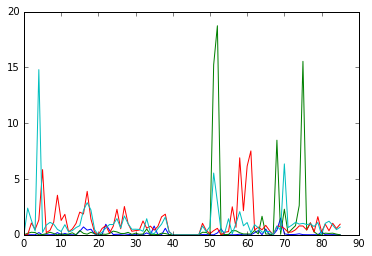

In [19]:
plt.plot(M[1,:])
plt.plot(M[100,:])
plt.plot(M[200,:])
plt.plot(M[298,:])

In [20]:
J=[l for l in range(75) if Num[l]==I]

NameError: name 'I' is not defined

In [ ]:
J

In [21]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(75) if Num[l]==I]
    CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [22]:
Time_fluoICA.shape

(11603,)

In [23]:
DT.shape

(6185, 349)

AME_R
124
AME_R
LO_R
ME_R
198
AME_R
NO
EB
FB
210
AME_R
249
AME_R
270
AME_R
BU_R
275
AME_R
LO_R
302
AME_R
LO_R
ME_R
309
accessory medulla


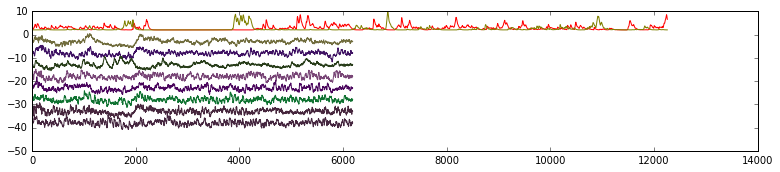

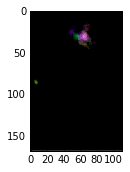

AME_R
LO_R
PVLP_R
106
LO_R
ME_R
110
LO_R
116
LO_R
PVLP_R
121
LO_R
LOP_R
122
LO_R
BU_R
PVLP_R
PLP_R
123
LO_R
ME_R
PVLP_R
PLP_R
140
LO_R
151
LO_R
LOP_R
163
LO_R
NO
ME_R
AME_L
171
LO_R
177
LO_R
ME_R
194
LO_R
ME_R
196
AME_R
LO_R
201
LO_R
ME_R
202
LO_R
BU_R
ME_R
205
LO_R
ME_R
214
LO_R
LOP_R
ME_R
215
AME_R
LO_R
ME_R
221
AME_R
LO_R
227
LO_R
AVLP_R
228
LO_R
ME_R
242
AME_R
LO_R
ME_R
245
LO_R
LOP_R
ME_R
248
LO_R
251
LO_R
ME_R
252
LO_R
265
AME_R
LO_R
ME_R
269
LO_R
ME_R
273
LO_R
ME_R
277
LO_R
BU_R
LOP_R
ME_R
278
LO_R
ME_R
287
LO_R
ME_R
295
LO_R
ME_R
299
LO_R
LOP_R
ME_R
AME_L
306
lobula


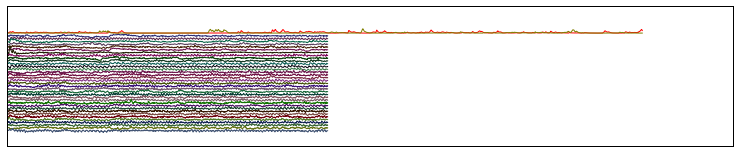

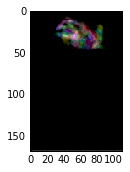

BU_R
LO_L
ME_L
193
LO_R
BU_R
ME_R
209
LO_R
BU_R
ME_R
AME_L
238
BU_R
ME_R
240
BU_R
ME_L
285
BU_R
286
LO_R
BU_R
ME_R
290
BU_R
AME_L
ME_L
298
BU_R
MB_PED_R
GA_R
AME_L
323
BU_R
331
BU_R
ME_R
341
bulb


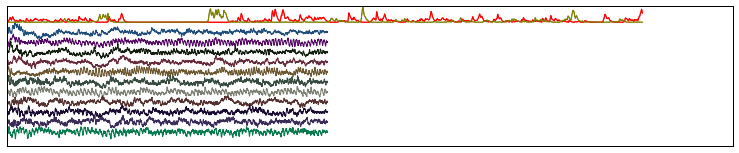

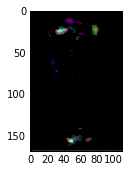

PB
0
PB
2
PB
ATL_R
4
PB
ATL_R
6
PB
ATL_L
7
PB
ATL_L
14
BU_R
PB
AME_L
ATL_L
126
protocerebral bridge


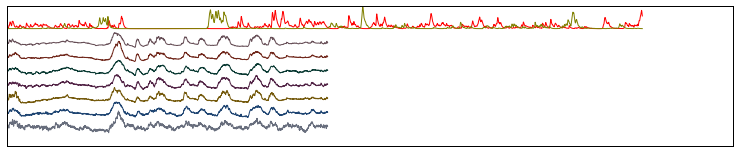

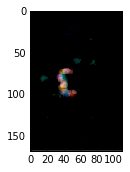

LH_R
MB_CA_R
56
lateral horn


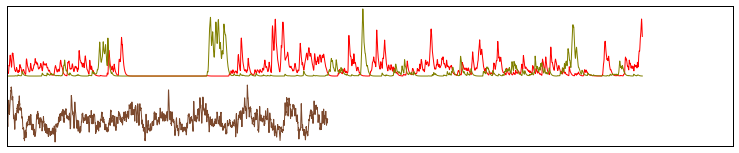

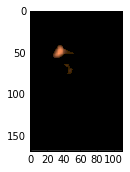

CAN_R
SPS_R
IPS_R
42
CAN_R
GNG
CAN_L
65
CAN_R
68
SAD
CAN_R
GNG
97
CAN_R
IPS_R
GNG
CAN_L
213
cantle


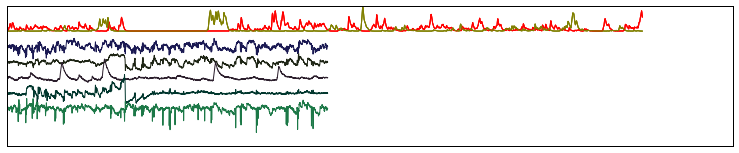

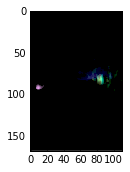

ICL_R
IB_R
MB_CA_R
103
inferior clamp


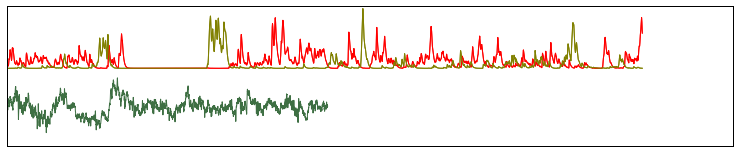

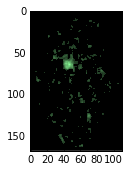

VES_R
IVLP_R
IVLP_L
301
vest


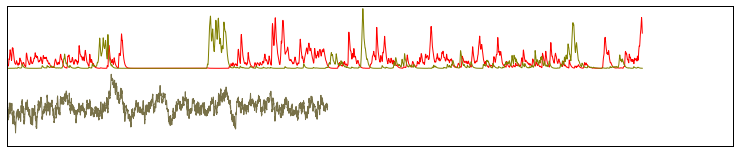

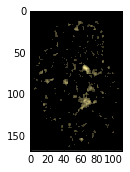

IB_R
IB_L
71
IB_R
ATL_R
86
NO
PB
IB_R
CAN_L
332
inferior bridge


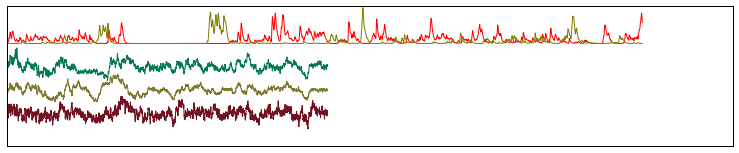

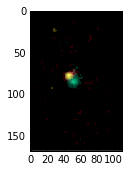

MB_VL_R
MB_ML_R
SIP_R
31
vertical lobe of adult mushroom body


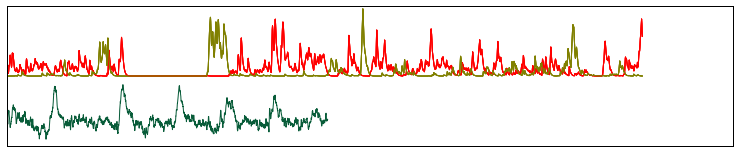

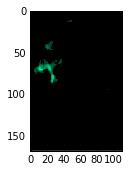

CRE_R
MB_VL_R
MB_ML_R
32
medial lobe of adult mushroom body


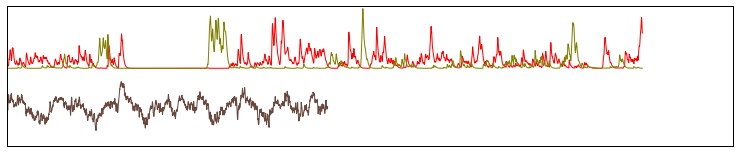

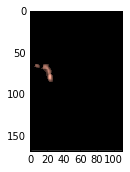

CAN_R
VES_R
FLA_R
PRW
186
flange


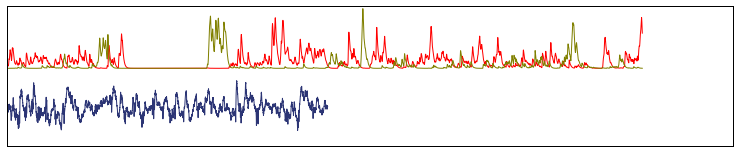

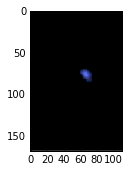

LOP_R
ME_R
3
LO_R
LOP_R
16
LOP_R
ME_R
17
LO_R
LOP_R
IPS_R
51
AME_R
LOP_R
ME_R
112
LO_R
LOP_R
ME_R
173
lobula plate


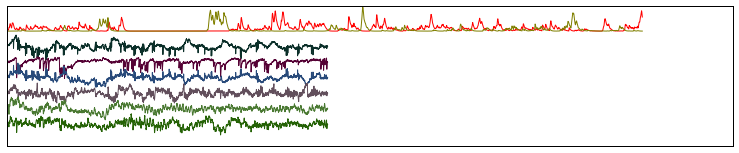

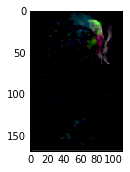

EB
53
EB
FB
96
EB
115
ellipsoid body


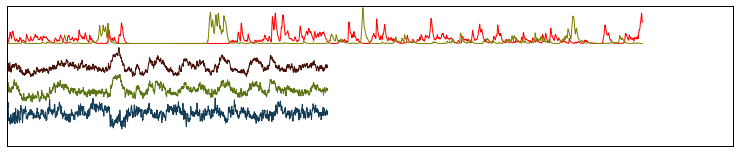

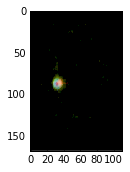

LAL_R
AL_R
GA_R
29
FLA_R
AL_R
AL_L
38
adult antennal lobe


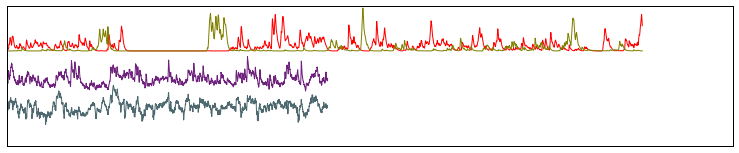

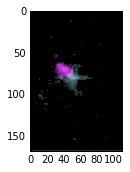

BU_R
ME_R
87
ME_R
113
ME_R
117
LO_R
ME_R
136
LO_R
ME_R
145
ME_R
161
LO_R
ME_R
179
ME_R
195
LO_R
ME_R
223
LO_R
ME_R
235
LO_R
ME_R
237
AME_R
LO_R
MB_PED_R
ME_R
243
AME_R
LOP_R
ME_R
274
LO_R
LOP_R
ME_R
276
LO_R
ME_R
282
ME_R
289
LO_R
MB_PED_R
ME_R
LO_L
292
medulla


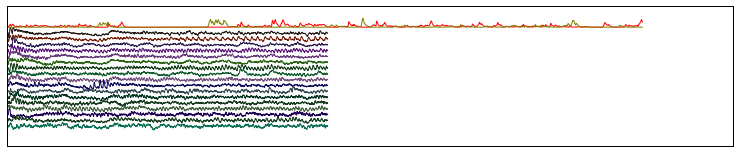

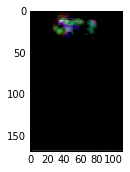

SLP_R
SIP_R
MB_PED_L
229
SLP_R
262
superior lateral protocerebrum


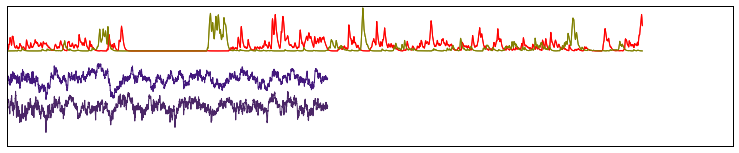

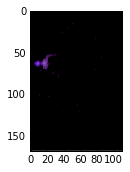

SMP_R
26
SMP_R
SMP_L
59
ATL_R
SMP_R
SMP_L
81
BU_R
EB
SMP_R
268
superior medial protocerebrum


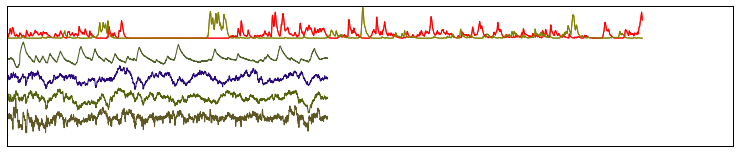

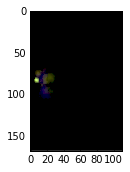

AVLP_R
AVLP_L
77
anterior ventrolateral protocerebrum


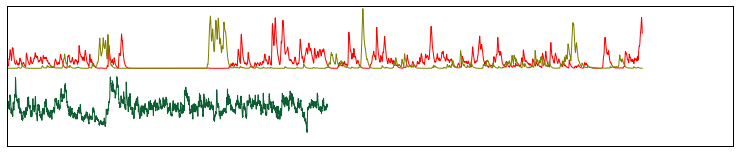

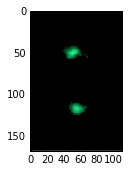

PVLP_R
PLP_R
47
BU_R
AMMC_R
PLP_R
IPS_R
92
posterior lateral protocerebrum


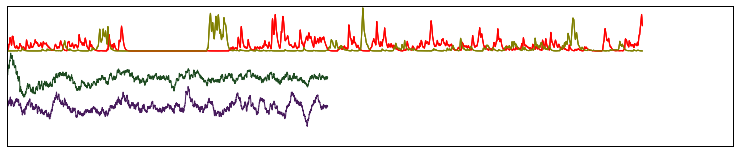

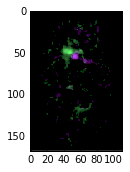

MB_VL_R
MB_CA_R
35
LH_R
MB_CA_R
189
calyx of adult mushroom body


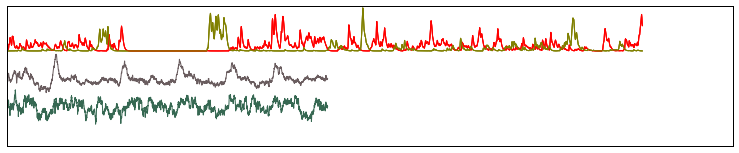

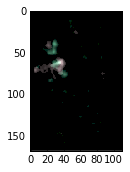

IB_R
SPS_R
IB_L
46
SPS_R
48
superior posterior slope


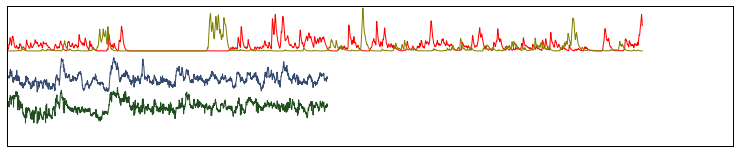

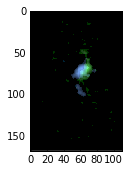

VES_R
SPS_R
IPS_R
15
SAD
AMMC_R
IPS_R
19
IPS_R
187
inferior posterior slope


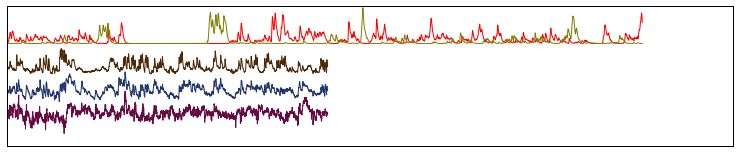

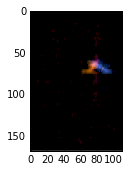

MB_PED_R
MB_ML_R
MB_CA_R
SCL_R
63
superior clamp


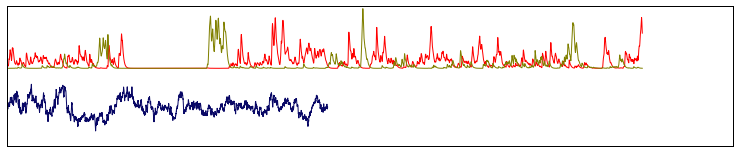

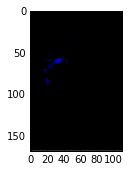

GNG
20
IPS_R
GNG
41
IPS_R
GNG
45
GNG
54
BU_R
GNG
CAN_L
74
CAN_R
IPS_R
GNG
78
SAD
CAN_R
AOTU_R
GNG
85
CAN_R
IPS_R
GNG
CAN_L
166
BU_R
IPS_R
GNG
168
GNG
IPS_L
183
adult gnathal ganglion


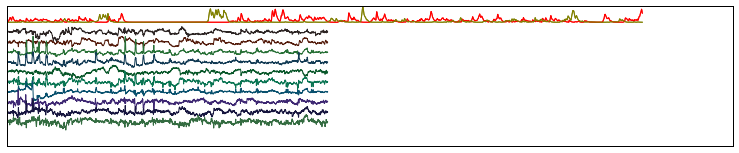

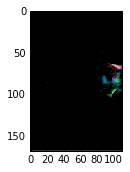

PRW
9
prow


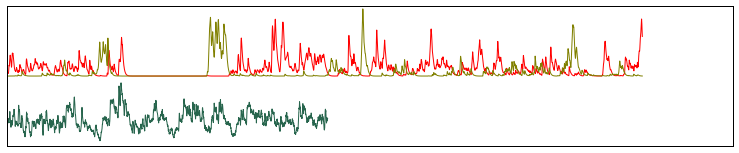

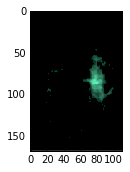

AME_L
ME_L
93
AME_L
LO_L
119
NO
ME_R
FB
AME_L
141
AME_R
AME_L
LO_L
ME_L
144
AME_L
162
AME_R
AME_L
LO_L
165
AME_L
182
AME_L
LO_L
ME_L
207
AME_L
LO_L
211
BU_R
AME_L
LO_L
PVLP_L
222
LO_R
ME_R
AME_L
VES_L
234
AME_L
281
AME_L
317
ME_R
AME_L
318
BU_R
MB_PED_R
ME_R
AME_L
320
accessory medulla


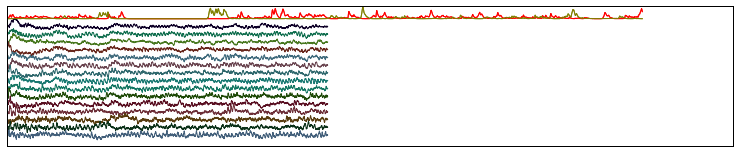

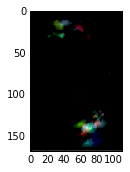

LO_L
44
AME_L
LO_L
60
LO_L
80
AME_L
LO_L
LOP_L
PVLP_L
100
LO_L
AVLP_L
PVLP_L
101
LO_L
105
AME_L
LO_L
ME_L
114
LO_L
LOP_L
IPS_L
127
AME_L
LO_L
ME_L
PVLP_L
129
LO_L
130
LO_L
LOP_L
AVLP_L
132
BU_R
AME_L
LO_L
ME_L
135
LO_L
ME_L
PVLP_L
137
LO_L
ME_L
147
LO_L
ME_L
149
LO_L
ME_L
155
LO_L
LOP_L
AVLP_L
PVLP_L
157
LO_L
AVLP_L
158
LO_L
ME_L
AVLP_L
164
LO_L
ME_L
169
BU_R
AME_L
LO_L
172
BU_R
LO_L
ME_L
178
LO_L
ME_L
180
LO_L
181
LO_L
ME_L
203
LO_L
IPS_L
216
AME_L
LO_L
217
MB_PED_R
LO_L
ME_L
220
LO_L
ME_L
255
LO_L
LOP_L
ME_L
266
LO_L
280
LO_L
ME_L
283
LO_L
LOP_L
ME_L
PVLP_L
321
lobula


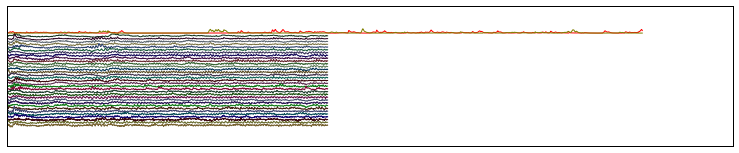

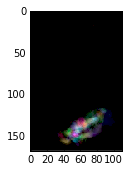

BU_L
191
BU_L
AOTU_L
206
AME_R
NO
ME_R
BU_L
304
bulb


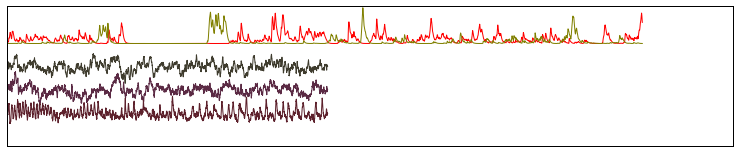

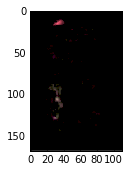

LH_L
LAL_L
MB_VL_L
AL_L
89
LH_L
156
LH_L
AL_L
MB_CA_L
SCL_L
167
lateral horn


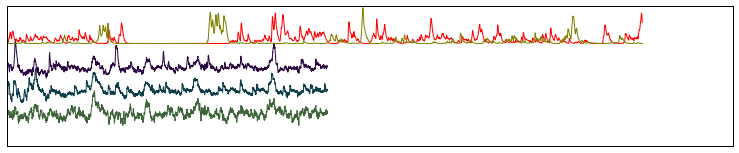

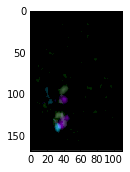

SAD
GNG
CAN_L
FLA_L
8
CAN_R
AMMC_R
CAN_L
SPS_L
57
cantle


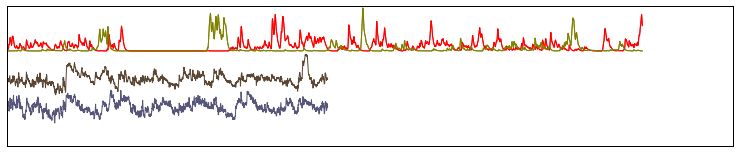

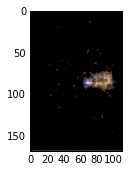

CAN_L
VES_L
FLA_L
111
vest


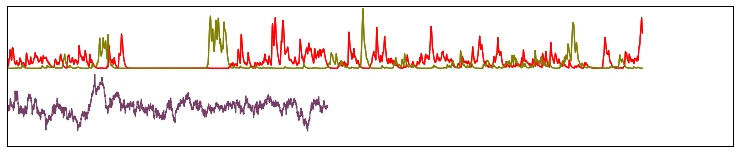

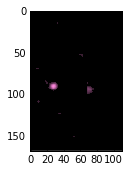

IB_L
75
inferior bridge


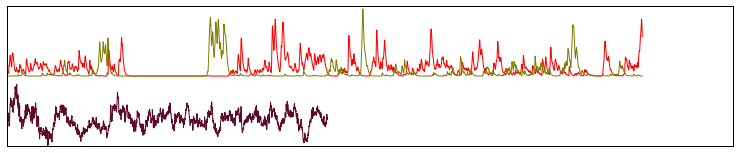

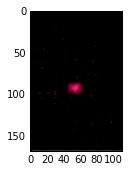

PB
FB
ATL_L
49
ATL_L
72
antler


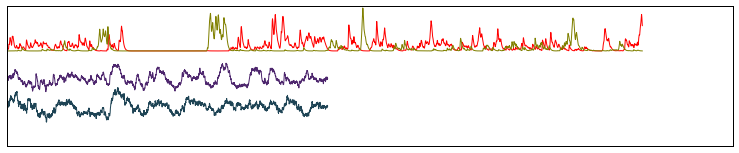

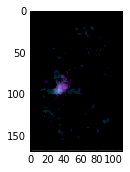

MB_PED_L
MB_ML_L
MB_CA_L
SCL_L
146
pedunculus of adult mushroom body


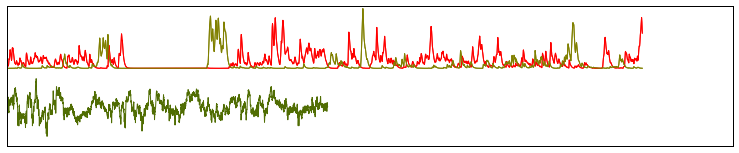

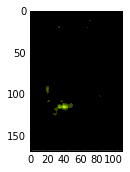

CRE_L
MB_VL_L
MB_ML_L
SIP_L
24
medial lobe of adult mushroom body


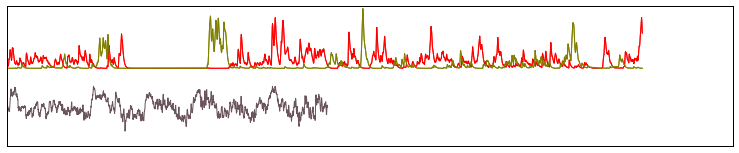

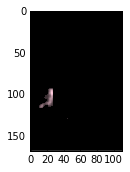

PRW
FLA_L
67
flange


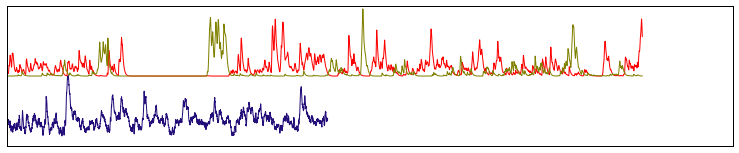

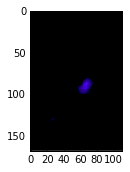

LOP_L
22
LO_L
LOP_L
28
SAD
AMMC_R
LOP_L
34
LOP_L
ME_L
94
BU_R
LOP_L
ME_L
98
lobula plate


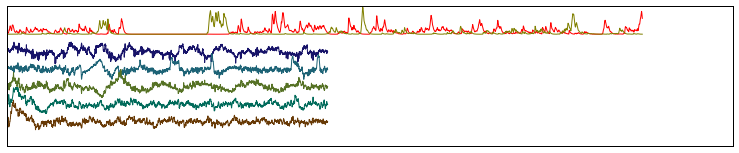

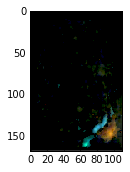

LAL_L
AL_L
39
adult antennal lobe


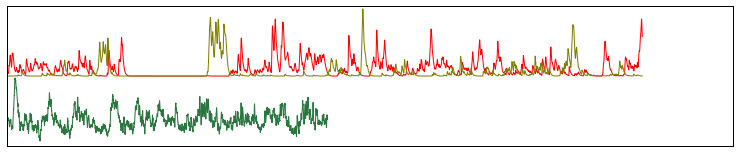

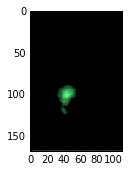

LO_L
ME_L
43
LO_L
ME_L
61
BU_R
LO_L
LOP_L
ME_L
69
AME_L
LO_L
LOP_L
ME_L
84
LO_L
ME_L
88
LO_L
ME_L
107
LO_L
ME_L
128
LO_L
ME_L
133
LO_L
ME_L
139
LO_L
LOP_L
ME_L
142
ME_L
152
LO_L
ME_L
160
AME_L
LO_L
ME_L
185
LO_L
LOP_L
ME_L
188
LO_L
ME_L
190
LO_L
LOP_L
ME_L
PVLP_L
197
ME_L
219
NO
LO_L
LOP_L
ME_L
225
LO_L
LOP_L
ME_L
247
AME_L
LO_L
ME_L
250
BU_R
LO_L
ME_L
260
LO_L
ME_L
261
LO_L
BU_L
ME_L
264
LO_L
ME_L
AVLP_L
279
BU_R
LO_L
ME_L
303
medulla


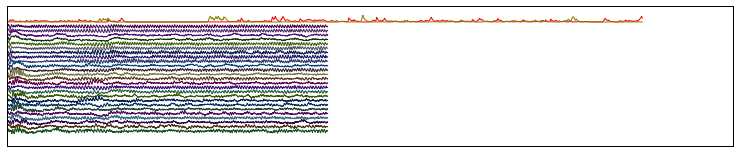

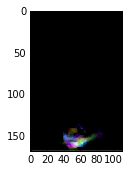

LH_L
SLP_L
131
SLP_L
SMP_L
226
superior lateral protocerebrum


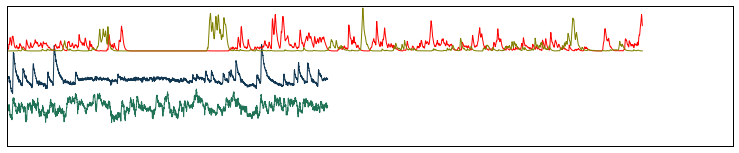

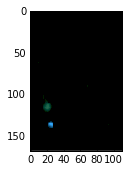

SMP_R
SMP_L
40
BU_R
SMP_L
125
superior medial protocerebrum


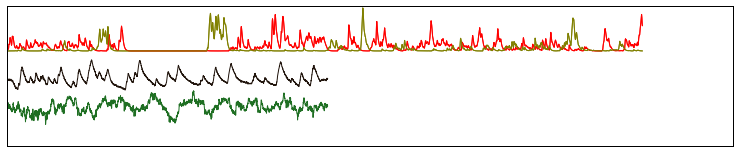

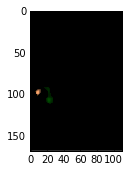

PLP_L
25
PLP_L
MB_CA_L
SCL_L
83
posterior lateral protocerebrum


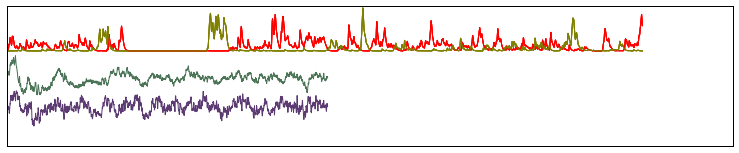

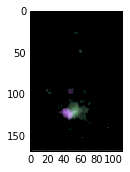

MB_PED_L
MB_VL_L
MB_CA_L
5
MB_PED_L
MB_CA_L
SCL_L
153
MB_CA_L
208
SLP_L
MB_CA_L
SCL_L
253
MB_CA_L
305
calyx of adult mushroom body


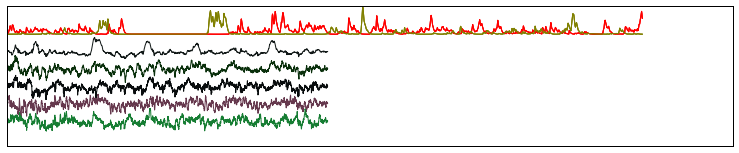

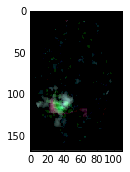

VES_L
IVLP_L
SPS_L
IPS_L
18
IB_R
IB_L
SPS_L
27
BU_L
ICL_L
VES_L
SPS_L
70
SPS_L
IPS_L
108
superior posterior slope


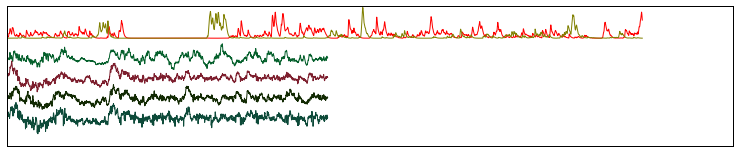

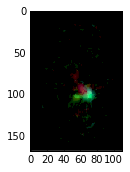

CAN_L
IPS_L
13
SAD
GNG
AMMC_L
IPS_L
37
inferior posterior slope


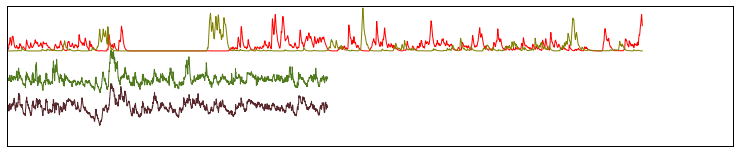

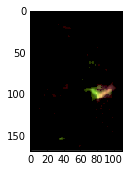

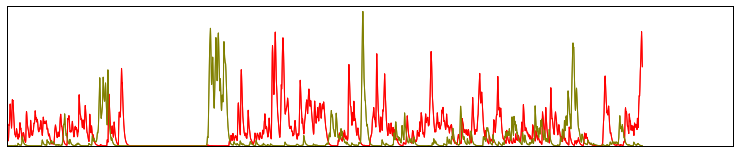

In [26]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)        
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
    plt.plot(Xk[:,0]/np.std(Xk[:,0])+2,color=(1,0,0))   
    plt.plot(Xk[:,1]/np.std(Xk[:,1])+2,color=(0.5,0.5,0))
    #plt.plot(Xk[:,4]/np.std(Xk[:,4])+6,color=(1,0,1))
    #plt.plot(Xk[:,6]/np.std(Xk[:,6])+12,color=(0,1,0))
    #plt.plot(Xk[:,7]/np.std(Xk[:,7])+12,color=(0,0,1))
    #plt.plot(Time_fluoICA.T,2*Xk[:,2]/np.max(Xk[:,2])+1.5,color=(1,0,1))    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)


In [28]:
sum(GoodICAnat)-7-4-6-10-4-3

208.0

In [41]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape

/media/sophie2/100148/100148ss2it30/AVG_100148ss2onc500regcpsf.nii


(181, 109, 9)

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [57]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

In [58]:
SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

In [59]:
Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

In [60]:
LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

In [61]:
LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

In [62]:
LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

In [63]:
SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

In [64]:
NewOrder=np.argsort(SmallRegion)

In [65]:
SmallRegion[NewOrder]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  7,  7,  7, 10, 11, 12, 12,
       12, 13, 13, 14, 16, 16, 16, 17, 17, 17, 17, 18, 18, 19, 19, 19, 19,
       19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 22, 23, 23, 24, 24,
       25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 28, 28, 28, 28, 28, 29, 29,
       29, 29, 29, 30, 31, 31, 32, 32, 34, 34, 35, 35, 35, 44, 44, 45, 45,
       45, 45, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48,
       48, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 53, 54, 54, 54, 54, 54,
       54, 55, 55, 55, 55

# Last pruning by hand

In [66]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [67]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

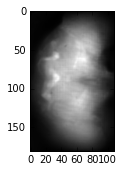

In [68]:
plt.imshow(Dmean[:,:,1],cmap=plt.cm.gray)

In [69]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (15, 2.5)

In [81]:
algorithm = linear_model.LinearRegression()

In [162]:
Sxk=Xk.shape

In [163]:
Sxk

(11603, 8)

In [164]:
X=np.zeros((11603, 6))

In [165]:
X[:,0]=(Xk[:,0]-np.mean(Xk[:,0]))/np.std(Xk[:,0])
X[:,1]=(Xk[:,1]-np.mean(Xk[:,1]))/np.std(Xk[:,1])
X[:,2]=(Xk[:,3]-np.mean(Xk[:,3]))/np.std(Xk[:,3])
X[:,3]=(Xk[:,4]-np.mean(Xk[:,4]))/np.std(Xk[:,4])
X[:,4]=(Xk[:,6]-np.mean(Xk[:,6]))/np.std(Xk[:,6])
X[:,5]=(Xk[:,7]-np.mean(Xk[:,7]))/np.std(Xk[:,7])

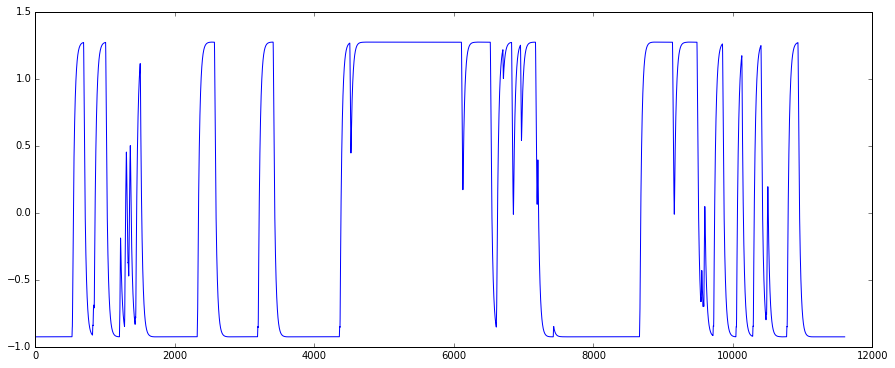

In [310]:
#plt.plot(X[:,0])
#plt.plot(X[:,1])
#plt.plot(X[:,2])
plt.plot(X[:,3])

In [167]:
Rsq=np.zeros((4,S[3]))
Betas=np.zeros((4,S[3]))

In [169]:
for j in range(S[3]):

    a=''
    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,Order[j]]
            D1[:,:,i]=V 

    if (CompMainName[j] != '') and (LargerRegionI[j]!=1) and (LargerRegionI[j]==1 or LargerRegionI[j]==1
                                                             
                                                             
                                                             ):
        print(j)
        print(CompMainName[j])
        for i in range(Nstack):
            plt.subplot(1,5,i+1)
            plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
            plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
            frame1 = plt.gca()
            frame1.axes.get_xaxis().set_visible(False)
            frame1.axes.get_yaxis().set_visible(False)
        
        plt.show()
        
        model = algorithm.fit(X, DT[:,j])
        betas = model.coef_
        rsq = model.score(X,DT[:,j])
        print('left:',betas[0],'right:',betas[1],'walk:',betas[2],'groom:',betas[3])
        print(rsq)
        plt.plot(Time_fluoICA.T,2*DT[:,j]+1.5)
        plt.plot(Time_fluoICA.T,X[:,0],color=(1,0,0))   
        plt.plot(Time_fluoICA.T,X[:,1],color=(1,0,0))
        plt.show()
        a=raw_input()
    
    Label_ICs.append(a)
    if Label_ICs[j]!='':
        Good_ICs[j]=1

In [170]:
Dmaps.shape

(181, 109, 9, 300)

In [171]:
fn=open('/home/sophie/Desktop/100148GoodICs150.txt','w')
for i in range(S[3]):
    if Good_ICs[i]:
        print>>fn, i
        print>>fn, CompMainName[i]
        print>>fn, Good_ICs[i]

In [172]:
if len(Label_ICs)<S[3]:
    for j in range(S[3]-len(Label_ICs)):
      Label_ICs.append('')  

In [147]:
G=Good_ICs.tolist();

In [148]:
len(Good_ICs)

300

# Plot all components for turning left, right, walking, and grooming

In [174]:
Rsq=np.zeros((1,S[3]))
Betas=np.zeros((6,S[3]))
for j in range(S[3]):
    model = algorithm.fit(X, DT[:,j])
    Betas[:,j] = model.coef_
    Rsq[:,j] = model.score(X,DT[:,j])

In [175]:
RsqUni=np.zeros((6,S[3]))
BetaUni=np.zeros((6,S[3]))
Sx=X.shape
for k in range(6):
    for j in range(S[3]):
        model = algorithm.fit(np.reshape(X[:,k],(Sx[0],1)), DT[:,j])
        BetaUni[k,j] = model.coef_
        RsqUni[k,j] = model.score(np.reshape(X[:,k],(Sx[0],1)),DT[:,j])
    

In [336]:
RsqUni.shape

(6, 300)

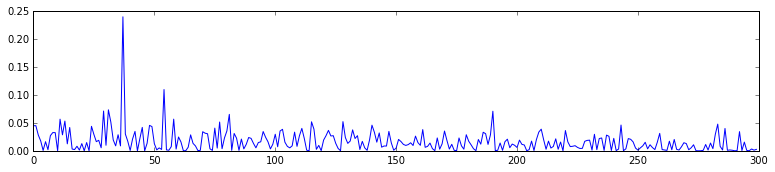

In [176]:
plt.plot(RsqUni[0,:])

In [295]:
GoodICo=Good_ICs[NewOrder]
D2o=D2[:,:,:,NewOrder]
LargerRegionIo=LargerRegionI[NewOrder]
Ind=np.array(range(S[3]))
Indexo=Ind[NewOrder]
DTo=DT[:,NewOrder]

In [351]:
import random

In [453]:
del Final_map
del Fmaps

In [454]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [455]:
random.uniform(0,1)

0.6169860564661207

In [457]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if Betas[1,j]>0.85*np.max(Betas[1,:]):
    #if 1>0.1:
        #C[j,:]=C1[i%6][:]
        C[j,2]=1
        C[j,1]=random.uniform(0,1)
        #C[j,2]=1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.8*D2[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        J=j
        #print(Indexo[j])
        i=i+1

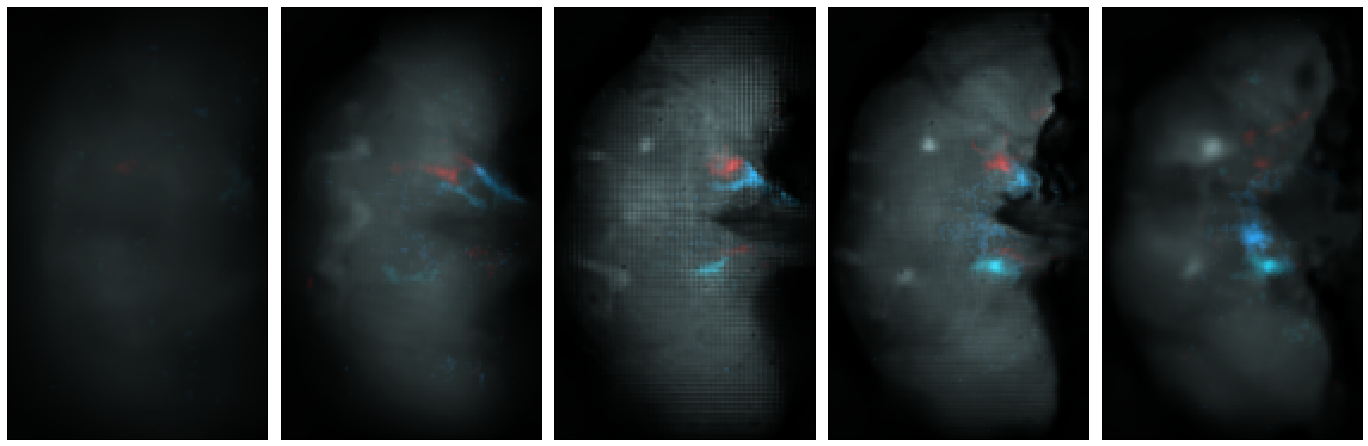

In [462]:
pylab.rcParams['figure.figsize'] = (19, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/16
    Df=Df/(np.max(np.max(Df)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Df[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

# Plot all components together

In [150]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])

In [151]:
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [152]:
GoodICo=Good_ICs[NewOrder]
D2o=D2[:,:,:,NewOrder]
LargerRegionIo=LargerRegionI[NewOrder]
Ind=np.array(range(S[3]))
Indexo=Ind[NewOrder]
DTo=DT[:,NewOrder]

In [153]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if LargerRegionIo[j]<12 and GoodICo[j]:
        C[j,:]=C1[i%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.6*D2o[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #print(Indexo[j])
        i=i+1

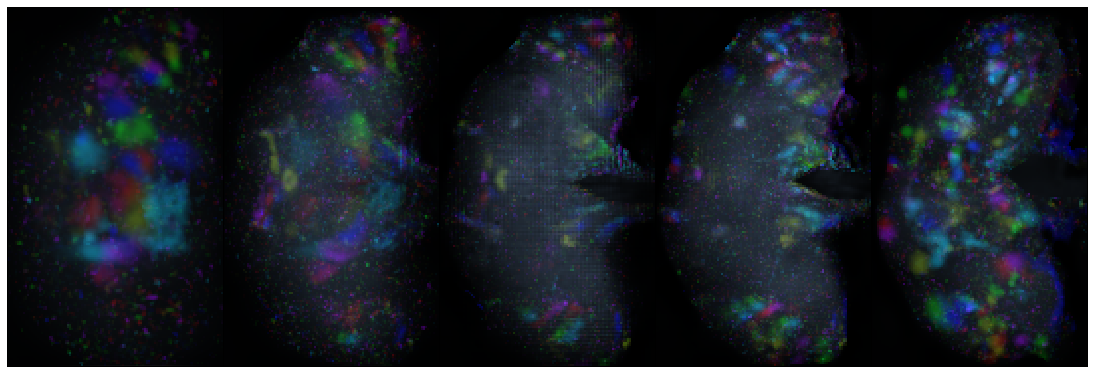

In [154]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/16
    Df=Df/(np.max(np.max(Df)))
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)

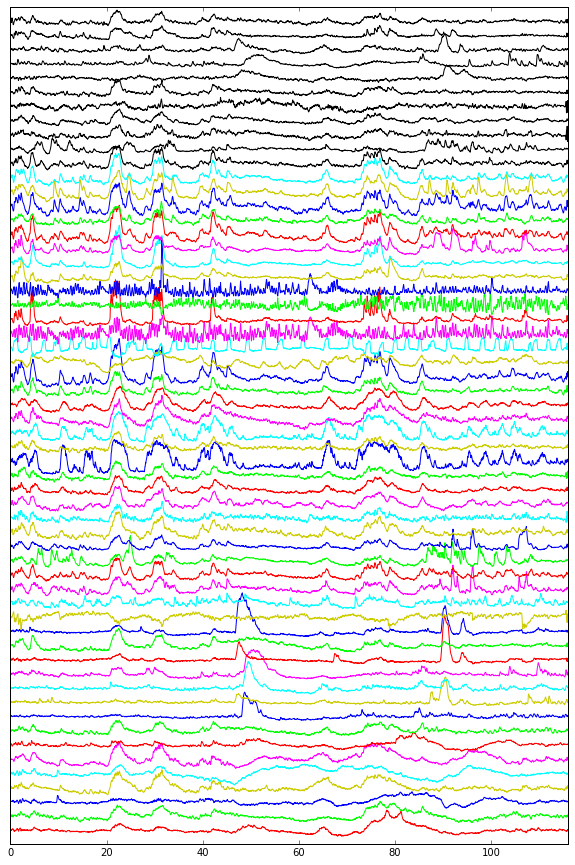

In [123]:
pylab.rcParams['figure.figsize'] = (10, 15)
h=0.5
i=0

for j in range(S[3]):
    if GoodICo[j]:
        plt.plot(Time_fluoICA,(DTo[:,j]+h*i),color=C[j,:]) 
        i=i+1
plt.xlim([np.min(Time_fluoICA),np.max(Time_fluoICA)])
plt.ylim([-0.5,h*i])
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
plt.show()

In [124]:
k=0
J=np.zeros(len(GoodICo[GoodICo==1]))
for j in range(len(GoodICo)):
    if GoodICo[j]:
        print(k)
        print([CompMainName[Indexo[j]]])
        J[k]=j
        k=k+1

0
['ME_L']
1
['ME_L']
2
['ME_L']
3
['ME_L']
4
['ME_L']
5
['ME_L']
6
['ME_R']
7
['ME_R']
8
['LO_R']
9
['LO_R']
10
['LO_R']
11
['LO_R']
12
['LO_L']
13
['LO_L']
14
['LO_L']
15
['LOP_L']
16
['AVLP_R']
17
['AVLP_L']
18
['IVLP_R']
19
['IVLP_R']
20
['IVLP_L']
21
['AL_L']
22
['MB_VL_R']
23
['SMP_R']
24
['EB']
25
['PB']
26
['PB']
27
['PB']
28
['PB']
29
['PB']
30
['PB']
31
['SPS_R']
32
['SPS_L']
33
['IPS_R']
34
['IPS_R']
35
['IPS_R']
36
['IPS_R']
37
['IPS_R']
38
['IPS_R']
39
['IPS_R']
40
['IPS_L']
41
['IPS_L']
42
['SAD']
43
['FLA_L']
44
['PRW']
45
['PRW']
46
['PRW']
47
['GNG']
48
['']
49
['']
50
['']
51
['']
52
['']
53
['']
54
['']
55
['']
56
['']
57
['']


In [125]:
Sets=[range(10),range(10,12),range(12,17),range(17,20),20,range(21,23),range(23,25),25]

In [126]:
pylab.rcParams['figure.figsize'] = (12, 6)

for i in range(len(Sets)):
    
    Final_map2=np.zeros([S[0],S[1],3]) 
    Fmaps2=np.zeros([S[0],S[1],3]) 
    Final_map3=np.zeros([S[0],S[1],5,3]) 
    Fmaps3=np.zeros([S[0],S[1],5,3])     
     
    if type(Sets[i])==list:
        for j in np.array(Sets[i]):
            C=np.zeros((S[3],3))
            C[j,:]=C1[j%6][:]
            
            for k in range(3):           
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
                Fmaps2[:,:,k]=0.9*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1],5)))
                Fmaps3[:,:,:,k]=0.9*D2o[:,:,:,J[j]]*C[j,k]/M                
            Final_map2=Final_map2+Fmaps2
            Final_map3=Final_map3+Fmaps3            
                
    else:
        j=Sets[i]
        C[j,:]=C1[j%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
            Fmaps2[:,:,k]=0.8*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
        Final_map2=Final_map2+Fmaps2
                
    Df=np.zeros([S[0],S[1],3]) 
  
    for l in range(3):
        Df[:,:,l]=Final_map2[:,:,l]+np.mean(Dmean,2)/16
    MM=np.max(np.max(Df))

    Rotated=ndimage.rotate(Df[:,:,:]/MM,-90)
    a=plt.imshow(Rotated,cmap=my_cmap,interpolation='none')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

    plt.show()
                                

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: total size of new array must be unchanged